### Agenda
- In the lecture session, we have seen
    - Fundamentals of Time Series Analysis
    - Smoothing Techniques
        - Simple Moving Average
        - Weighted Moving Average
        - Exponential Moving Average
    - Forcasting models
        - Moving average models
        - Holts-Winter
        - Arima
- In the lab we work on
    - Data preparation for time series analysis
    - Data Decomposition into trend, seasonality and randomness
    - Forcasting with various time series models

### Problem Statement


A multinational e-commerce company idenified a segment of products which are showing less sales when comapred to other class of products. As the prices of those products are volatile periodically based on demand and other economic factors, if they quote right price on time then the chance of incrasing sales is very high. 

They want to understand what is right price to quote on a given period for each product which will help them to increase the sales. The given data contains historical data of a product. Perform time series analysis and forecast the price.

In [316]:
# Load the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [317]:
data = pd.read_csv("TimeSeries.csv") # Reading the data 

In [318]:
data.shape  # check how many rows and columns

(19657, 3)

In [319]:
data.head(10) # check the top 5 records

,SKU,Price,Date
0,1,129.98,01-06-2009
1,2,57.96,01-06-2009
2,3,84.38,08-12-2009
3,1,159.96,08-12-2009
4,2,56.98,08-12-2009
5,2,58.38,08-12-2009
6,2,57.96,01-06-2009
7,1,93.48,01-06-2009
8,1,93.48,01-06-2009
9,2,61.97,08-12-2009


In [320]:
data.info() # check the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19657 entries, 0 to 19656
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SKU     19657 non-null  int64  
 1   Price   19657 non-null  float64
 2   Date    19657 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 460.8+ KB


In [321]:
data.SKU.value_counts() # check the frequency

1    6997
2    6812
3    5848
Name: SKU, dtype: int64

In [322]:
data.dtypes # check the data types

SKU        int64
Price    float64
Date      object
dtype: object

### Basic Data preprocessing

In [323]:
data['SKU'] = data['SKU'].astype('category') # Convert 'SKU' variable to category
data['date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y') # Convert date variable into Date format 

In [324]:
data.describe(include='all') # check the summary of the data 

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,SKU,Price,Date,date
count,19657.0,19657.000000,19657,19657
unique,3.0,NaN,1657,1657
top,1.0,NaN,23-07-2012,2013-01-30 00:00:00
freq,6997.0,NaN,23,23
first,NaN,NaN,NaN,2009-03-06 00:00:00
last,NaN,NaN,NaN,2013-12-02 00:00:00
mean,NaN,80.625467,NaN,NaN
std,NaN,37.894582,NaN,NaN
min,NaN,20.270000,NaN,NaN
25%,NaN,50.150000,NaN,NaN


In [325]:
data[data.Price==999] # checking how many rows are with price:999

,SKU,Price,Date,date
3441,3,999.0,24-08-2010,2010-08-24


In [326]:
# removing the records with price more  than 999
data = data[data.Price!=999]

In [327]:
# Let us focus on speciffic product. So, filter the data only for one particular SKU
df1 = data[data.SKU==3]
df1.shape
df1.describe()


,Price
count,5847.000000
mean,73.142588
std,17.943083
min,39.840000
25%,60.000000
50%,72.250000
75%,83.750000
max,379.800000


In [328]:
df1.head()

,SKU,Price,Date,date
2,3,84.38,08-12-2009,2009-12-08
11,3,115.98,01-06-2009,2009-06-01
22,3,115.98,02-06-2009,2009-06-02
23,3,84.38,09-12-2009,2009-12-09
35,3,115.98,03-06-2009,2009-06-03


In [329]:
# As all records are from the same SKU, let us delete this variable
df1 = df1.drop(["SKU",'Date'], axis=1)

In [330]:
sorted_data = df1.sort_values('date',ascending=True) # sort the data in the descending order 


In [331]:
sorted_data.head(10) # Check the top 10 records of the data 

,Price,date
1983,58.65,2009-04-15
2005,79.64,2009-04-16
2008,58.65,2009-04-16
2020,79.64,2009-04-17
2030,58.65,2009-04-17
2044,79.64,2009-04-18
2795,115.98,2009-05-30
2822,115.98,2009-05-31
11,115.98,2009-06-01
22,115.98,2009-06-02


In [332]:
unique_data = pd.DataFrame(sorted_data.groupby(['date'],as_index=False)['Price'].min())

In [ ]:
unique_data.tail()

In [334]:
# get the min and max of data 

minDate = min(unique_data.date)
maxDate = max(unique_data.date)
print(minDate)
print(maxDate)

2009-04-15 00:00:00
2013-12-02 00:00:00


In [335]:
# Creating the data sequence
seq = pd.DataFrame(pd.date_range(minDate,maxDate))
# Look at the head
seq.head()

,0
0,2009-04-15
1,2009-04-16
2,2009-04-17
3,2009-04-18
4,2009-04-19


In [336]:
# adding the column name 
seq.columns = ['Date']

In [337]:
unique_data.columns

Index(['date', 'Price'], dtype='object')

In [338]:
# Full outer join on both the dataframes 
data_all = pd.merge(seq,unique_data,how='outer',left_on=['Date'],right_on=['date'],sort=True)

In [339]:
data_all.tail(20) # verifying top 5 records to check if the merging done correctly or not 

,Date,date,Price
1673,2013-11-13,2013-11-13,48.25
1674,2013-11-14,2013-11-14,54.94
1675,2013-11-15,2013-11-15,54.94
1676,2013-11-16,NaT,NaN
1677,2013-11-17,2013-11-17,52.47
1678,2013-11-18,2013-11-18,52.42
1679,2013-11-19,2013-11-19,54.94
1680,2013-11-20,2013-11-20,54.94
1681,2013-11-21,2013-11-21,54.94
1682,2013-11-22,2013-11-22,54.94


In [340]:
data_all = data_all.drop(['date'],axis=1) # dropping the date variable

In [341]:
data_all.head(10)

,Date,Price
0,2009-04-15,58.65
1,2009-04-16,58.65
2,2009-04-17,58.65
3,2009-04-18,79.64
4,2009-04-19,NaN
5,2009-04-20,NaN
6,2009-04-21,NaN
7,2009-04-22,NaN
8,2009-04-23,NaN
9,2009-04-24,NaN


### Handling the missing values

In [342]:
s = pd.Series([1,np.nan,3,4,5,6,7])

In [343]:
s

0    1.0
1    NaN
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

In [344]:
s.interpolate(method='linear',limit_direction='forward')

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

In [345]:
s.interpolate(method='linear',limit_direction='backward')

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

In [346]:
s.interpolate(method='pad',limit=2)

0    1.0
1    1.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

In [347]:
data_all['Price'] = data_all['Price'].interpolate(method='linear',limit_direction='forward')

In [348]:
data_nomiss = data_all.copy()

In [349]:
data_nomiss.head(10)

,Date,Price
0,2009-04-15,58.650000
1,2009-04-16,58.650000
2,2009-04-17,58.650000
3,2009-04-18,79.640000
4,2009-04-19,80.505238
5,2009-04-20,81.370476
6,2009-04-21,82.235714
7,2009-04-22,83.100952
8,2009-04-23,83.966190
9,2009-04-24,84.831429


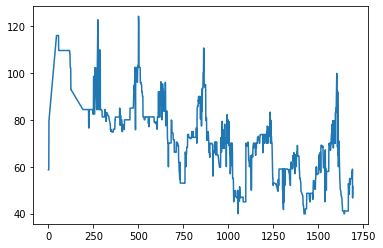

In [350]:
plt.plot(data_nomiss.Price)

In [351]:
data_nomiss['Month'] = data_nomiss['Date'].dt.month 
data_nomiss['Year'] = data_nomiss['Date'].dt.year 

In [352]:
data_nomiss.head()

,Date,Price,Month,Year
0,2009-04-15,58.650000,4,2009
1,2009-04-16,58.650000,4,2009
2,2009-04-17,58.650000,4,2009
3,2009-04-18,79.640000,4,2009
4,2009-04-19,80.505238,4,2009


In [353]:
agg_data = pd.DataFrame(data_nomiss.groupby(['Year','Month'],as_index=False)['Price'].mean())

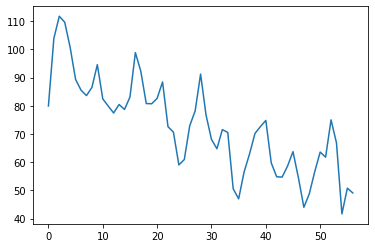

In [354]:
plt.plot(agg_data['Price'])

In [355]:
agg_data[:10]

,Year,Month,Price
0,2009,4,79.922411
1,2009,5,103.838756
2,2009,6,111.713333
3,2009,7,109.580000
4,2009,8,100.662903
5,2009,9,89.320833
6,2009,10,85.522581
7,2009,11,83.595000
8,2009,12,86.476774
9,2010,1,94.561613


In [356]:
agg_data['Date'] = pd.to_datetime(agg_data[['Year','Month']].assign(Day=1)) # adding the date variable 

In [357]:
agg_data.head()

,Year,Month,Price,Date
0,2009,4,79.922411,2009-04-01
1,2009,5,103.838756,2009-05-01
2,2009,6,111.713333,2009-06-01
3,2009,7,109.580000,2009-07-01
4,2009,8,100.662903,2009-08-01


In [358]:
agg_data.shape

(57, 4)

In [359]:
np.arange(1,len(agg_data))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56])

In [360]:
agg_data['Time_seq'] = np.arange(1,len(agg_data)+1)

In [361]:
agg_data = agg_data.drop(['Year'],axis=1)


In [362]:
agg_data.tail()

,Month,Price,Date,Time_seq
52,8,74.991129,2013-08-01,53
53,9,66.848000,2013-09-01,54
54,10,41.663871,2013-10-01,55
55,11,50.784500,2013-11-01,56
56,12,49.100000,2013-12-01,57


In [363]:
agg_data.set_index('Date',inplace=True)

In [364]:
agg_data

,Month,Price,Time_seq
Date,,,
2009-04-01,4,79.922411,1
2009-05-01,5,103.838756,2
2009-06-01,6,111.713333,3
2009-07-01,7,109.580000,4
2009-08-01,8,100.662903,5
2009-09-01,9,89.320833,6
2009-10-01,10,85.522581,7
2009-11-01,11,83.595000,8
2009-12-01,12,86.476774,9


In [365]:
train = agg_data.loc[agg_data.Time_seq <49,]
test = agg_data.loc[agg_data.Time_seq >=49,]

print(train.shape)
print(test.shape)

In [366]:
print(train.index.min())
print(train.index.max())
print(test.index.min())
print(test.index.max())

2009-04-01 00:00:00
2013-03-01 00:00:00
2013-04-01 00:00:00
2013-12-01 00:00:00


/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


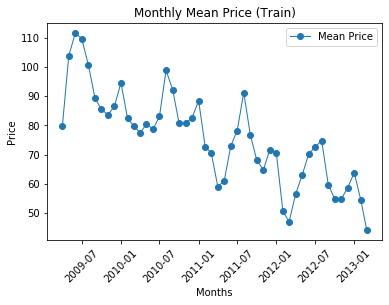

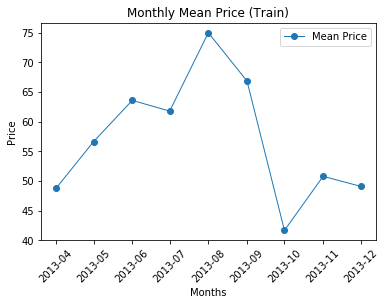

In [367]:
# Visualize train data
fig, ax = plt.subplots()
lines = plt.plot(train.index, train.Price, '-o')
plt.setp(lines, linewidth=1.0)
plt.xticks(rotation = 45)
plt.title('Monthly Mean Price (Train)')
plt.xlabel('Months')
plt.ylabel('Price')
plt.legend(['Mean Price'],loc = 'best')
plt.show()
fig, ax = plt.subplots()
lines = plt.plot(test.index, test.Price, '-o')
plt.setp(lines, linewidth=1.0)
plt.xticks(rotation = 45)
plt.title('Monthly Mean Price (Train)')
plt.xlabel('Months')
plt.ylabel('Price')
plt.legend(['Mean Price'],loc = 'best')
plt.show()

In [368]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

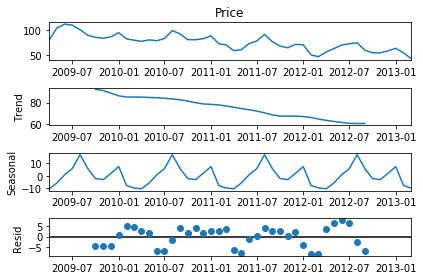

In [369]:
decomposition = seasonal_decompose(train.Price,period=12)
decomposition.plot()
plt.show()

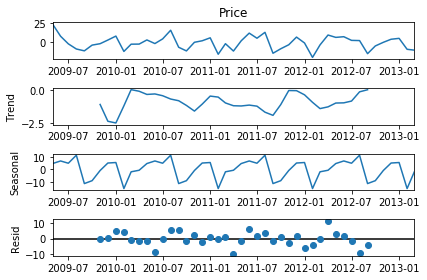

In [370]:
decomposition = seasonal_decompose(train.Price.diff(1)[1:],period=12)
decomposition.plot()
plt.show()

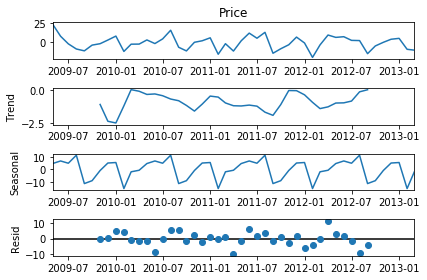

In [371]:
decomposition.plot()
plt.show()

### Time Series Modelling 

In [372]:
import statsmodels.api as sm # loadig the modules to build the regression model

In [373]:
lm = sm.OLS(train.Price,train.Time_seq)

In [374]:
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              68.38
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                    1.01e-10
Time:                        11:15:49   Log-Likelihood:                         -255.25
No. Observations:                  48   AIC:                                      512.5
Df Residuals:                      47   BIC:                                      514.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [375]:
lm.fittedvalues[:10]

Date
2009-04-01     2.114488
2009-05-01     4.228976
2009-06-01     6.343463
2009-07-01     8.457951
2009-08-01    10.572439
2009-09-01    12.686927
2009-10-01    14.801414
2009-11-01    16.915902
2009-12-01    19.030390
2010-01-01    21.144878
dtype: float64

In [376]:
pred_test = lm.predict(test.Time_seq)

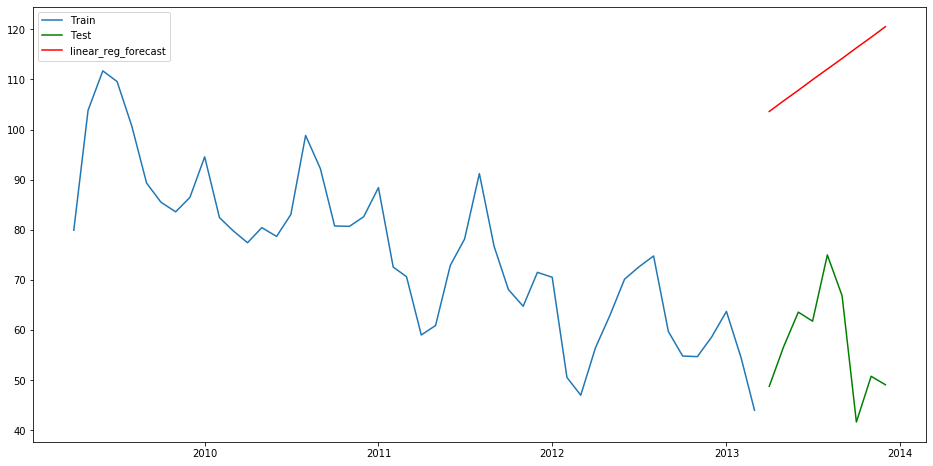

In [377]:
#Plot the predicted data
model_forecast = test.copy()
model_forecast['linear_reg_forecast'] = pred_test
plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test',color='green')
plt.plot(model_forecast['linear_reg_forecast'], label='linear_reg_forecast',color = 'red')
plt.legend()
plt.show()

In [378]:
model_forecast

,Month,Price,Time_seq,linear_reg_forecast
Date,,,,
2013-04-01,4,48.792000,49,103.609901
2013-05-01,5,56.641290,50,105.724389
2013-06-01,6,63.586333,51,107.838877
2013-07-01,7,61.783548,52,109.953365
2013-08-01,8,74.991129,53,112.067853
2013-09-01,9,66.848000,54,114.182340
2013-10-01,10,41.663871,55,116.296828
2013-11-01,11,50.784500,56,118.411316
2013-12-01,12,49.100000,57,120.525804


In [379]:
from sklearn import metrics

## Evaluating the model

In [380]:
def error_metrics(train_act,train_pred,test_act,test_pred):
        print('*** Error metrics Train data ***')
        print('MAE Train:', metrics.mean_absolute_error(train_act, train_pred))
        print('MSE Train:', metrics.mean_squared_error(train_act, train_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train_act, train_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(train_act, train_pred))

        print('***\n Error metrics Test Data ***')

        print('MAE Train:', metrics.mean_absolute_error(test_act,test_pred))
        print('MSE Train:', metrics.mean_squared_error(test_act,test_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(test_act,test_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(test_act,test_pred))
        



In [381]:
error_metrics(train.Price,lm.fittedvalues,test.Price,pred_test)

*** Error metrics Train data ***
MAE Train: 40.87788081063272
MSE Train: 2434.2523547808605
RMSE Train: 49.33814300093651
MAPE Train: 0.521036780719238
***
 Error metrics Test Data ***
MAE Train: 54.935555724372364
MSE Train: 3172.567218181148
RMSE Train: 56.32554676326851
MAPE Train: 1.027313277773886


### Adding the Month variable - to add seasonality Component

In [382]:
train['Month'] = train.Month.astype('category')
test['Month'] = test.Month.astype('category')


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [383]:
train.dtypes

Month       category
Price        float64
Time_seq       int64
dtype: object

In [384]:
train_dummy = pd.get_dummies(train,drop_first=True,dtype='int8')
test_dummy = pd.get_dummies(test,dtype='int8')

In [385]:
print(train_dummy.columns)
print("\n")
print(test_dummy.columns)

print("\n No. of columns in Train Data :{}".format(len(train_dummy.columns)))
print("\n")
print(test_dummy.columns)
print("\n No. of columns in Test Data :{}".format(len(test_dummy.columns)))



Index(['Price', 'Time_seq', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')


Index(['Price', 'Time_seq', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

 No. of columns in Train Data :13


Index(['Price', 'Time_seq', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

 No. of columns in Test Data :11


### Alligning the Levels b/w Train and Test Data sets 

In [386]:
train_allign,test_allign = train_dummy.align(test_dummy, join='outer', axis=1,fill_value=0)

In [387]:
train_allign.head()

,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Price,Time_seq
Date,,,,,,,,,,,,,
2009-04-01,0,0,0,0,0,1,0,0,0,0,0,79.922411,1
2009-05-01,0,0,0,0,0,0,1,0,0,0,0,103.838756,2
2009-06-01,0,0,0,0,0,0,0,1,0,0,0,111.713333,3
2009-07-01,0,0,0,0,0,0,0,0,1,0,0,109.580000,4
2009-08-01,0,0,0,0,0,0,0,0,0,1,0,100.662903,5


In [388]:
test_allign.head()

,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Price,Time_seq
Date,,,,,,,,,,,,,
2013-04-01,0,0,0,0,0,1,0,0,0,0,0,48.792000,49
2013-05-01,0,0,0,0,0,0,1,0,0,0,0,56.641290,50
2013-06-01,0,0,0,0,0,0,0,1,0,0,0,63.586333,51
2013-07-01,0,0,0,0,0,0,0,0,1,0,0,61.783548,52
2013-08-01,0,0,0,0,0,0,0,0,0,1,0,74.991129,53


In [389]:
train_allign = sm.add_constant(train_allign)
test_allign = sm.add_constant(test_allign)


In [390]:
print(train_allign.columns)
print("\n")
print(test_allign.columns)

print("\n No. of columns in Train Data :{}".format(len(train_allign.columns)))
print("\n")
print(test_allign.columns)
print("\n No. of columns in Test Data :{}".format(len(test_allign.columns)))



Index(['const', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Price', 'Time_seq'],
      dtype='object')


Index(['const', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Price', 'Time_seq'],
      dtype='object')

 No. of columns in Train Data :14


Index(['const', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Price', 'Time_seq'],
      dtype='object')

 No. of columns in Test Data :14


In [391]:
lm_season = sm.OLS(train_allign.Price,train_allign.drop(['Price'],axis=1))

In [392]:
lm_season = lm_season.fit()
print(lm_season.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     25.11
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.13e-13
Time:                        11:15:50   Log-Likelihood:                -146.27
No. Observations:                  48   AIC:                             318.5
Df Residuals:                      35   BIC:                             342.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9117      3.483     30.122      0.0

In [393]:
predtest_lmTime = lm_season.predict(test_allign.drop(['Price'],axis=1))

In [394]:
error_metrics(train.Price,lm_season.fittedvalues,test.Price,predtest_lmTime)

*** Error metrics Train data ***
MAE Train: 4.119509709951319
MSE Train: 25.958874845233243
RMSE Train: 5.0949852644765565
MAPE Train: 0.054855786508111175
***
 Error metrics Test Data ***
MAE Train: 7.119109464553619
MSE Train: 65.55446560651741
RMSE Train: 8.09657122530997
MAPE Train: 0.1207244157509047


### Modelling the time series using simple moving averages(SMA)

In [395]:
window=3
train['SMA_3'] = train['Price'].rolling(window).mean()


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


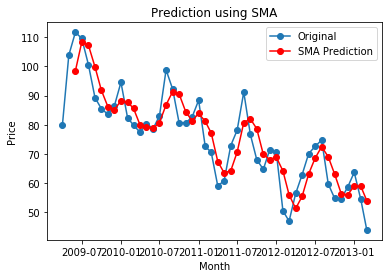

In [396]:
plt.plot(train.index,train.Price,'-o',label = 'Original')
plt.plot(train['SMA_3'],'-o', color='red', label = 'SMA Prediction')

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Prediction using SMA')
plt.legend()
plt.show()

### Forecasting on testdata


In [397]:
history = list(train['SMA_3'].values)
sma_predict = list()

for t in range(len(test)):
    length = len(history)
    yhat =np.mean(history[length-window:length])
    sma_predict.append(yhat)
    history.append(yhat)
    

In [398]:
sma_predict

[57.336862945895206,
 56.774335779712125,
 56.0559397697749,
 56.72237949846075,
 56.51755168264926,
 56.431956983628304,
 56.55729605491277,
 56.50226824039678,
 56.49717375964595]

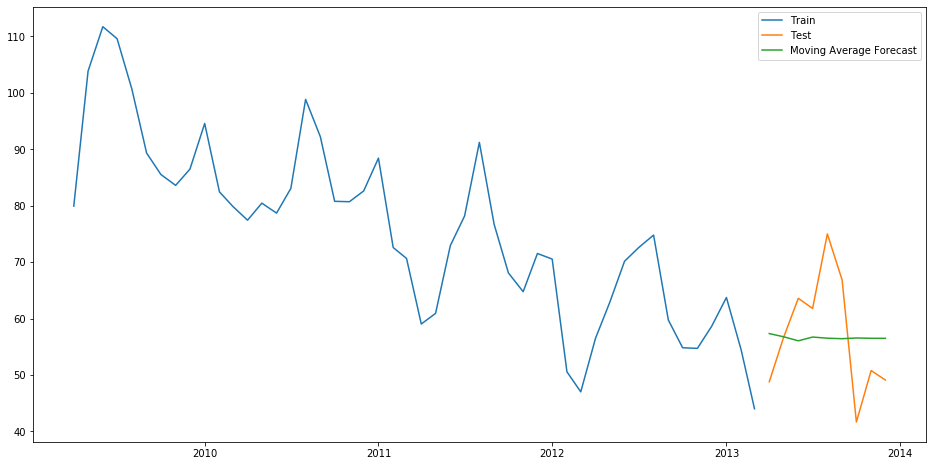

In [399]:
model_forecast=test.copy()
model_forecast['moving_avg_forecast'] = sma_predict
plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend()
plt.show()

In [400]:
pd.DataFrame(error_metrics(train['Price'][2:], train.SMA_3[2:],test['Price'], sma_predict))

*** Error metrics Train data ***
MAE Train: 5.7858801636528066
MSE Train: 45.986038457535116
RMSE Train: 6.781300646449405
MAPE Train: 0.08267890672316609
***
 Error metrics Test Data ***
MAE Train: 8.68527314537947
MSE Train: 101.59409087983501
RMSE Train: 10.079389410070187
MAPE Train: 0.15563261200028747


""


### Modelling the time series using Exponential moving averages (EMA)


In [401]:
train['EMA_3'] = train.Price.ewm(span=window).mean()


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


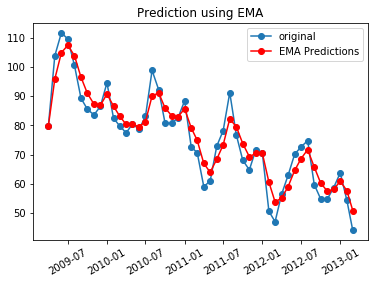

In [402]:
plt.plot(train.index,train.Price,'-o',label = 'original')
plt.plot(train.index,train['EMA_3'],'-o', color='red',label = 'EMA Predictions')

plt.title("Prediction using EMA")
plt.legend()
plt.xticks(rotation=30)
plt.show()

### Forecasting on testdata

In [403]:
history = list(train['EMA_3'].values)
ema_predict = list()

for t in range(len(test)):
    length = len(history)
    print(range(length-window,length))
    yhat=np.mean(history[length-window:length])
    ema_predict.append(yhat)
    history.append(yhat)


range(45, 48)
range(46, 49)
range(47, 50)
range(48, 51)
range(49, 52)
range(50, 53)
range(51, 54)
range(52, 55)
range(53, 56)


In [404]:
error_metrics(train['Price'][2:], train.EMA_3[2:],test['Price'], ema_predict)

*** Error metrics Train data ***
MAE Train: 3.981017221745753
MSE Train: 21.890938573290597
RMSE Train: 4.678775328362177
MAPE Train: 0.05706760698608182
***
 Error metrics Test Data ***
MAE Train: 8.965317633757998
MSE Train: 108.37010442603221
RMSE Train: 10.41009627361977
MAPE Train: 0.15615941927506763


In [405]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


## Holt Winter’s Exponential Smoothing
Holt-Winters exponential smoothing with trend and additive seasonal component.



/usr/share/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


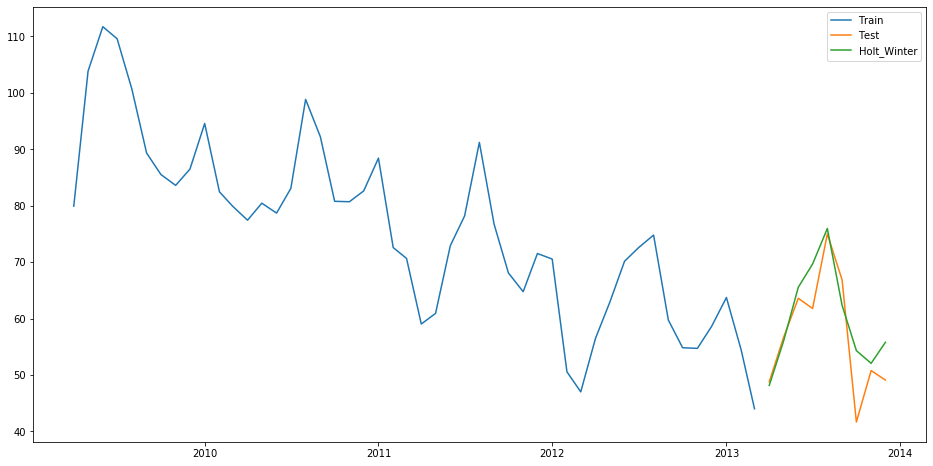

In [406]:

holt_exp_add = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12, seasonal='additive',).fit()
model_forecast['Holt_Winter'] = holt_exp_add.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [407]:
error_metrics(train['Price'][2:], holt_exp_add.forecast(len(train[2:])),test['Price'], 
              holt_exp_add.forecast(len(test)))


*** Error metrics Train data ***
MAE Train: 20.270043562038737
MSE Train: 576.5102021019258
RMSE Train: 24.010626857746253
MAPE Train: 0.25680317201988645
***
 Error metrics Test Data ***
MAE Train: 4.136189629200548
MSE Train: 32.727329495679356
RMSE Train: 5.720780497072
MAPE Train: 0.08093569394824844


## Holt-Winters exponential smoothing additive trend with multiplicative seasonal component.

In [408]:
holt_exp_mul = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 , seasonal='multiplicative',trend='add').fit()


/usr/share/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


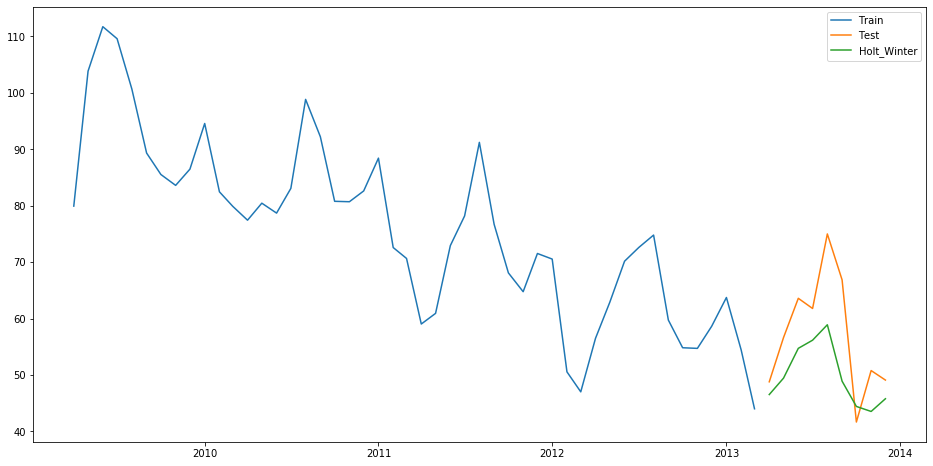

In [409]:
model_forecast['Holt_Winter'] = holt_exp_mul.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [410]:
error_metrics(train['Price'][2:], holt_exp_mul.forecast(len(train[2:])),test['Price'], 
              holt_exp_mul.forecast(len(test)))



*** Error metrics Train data ***
MAE Train: 42.43126698136754
MSE Train: 1889.1974456344606
RMSE Train: 43.464899006375944
MAPE Train: 0.5752799154500842
***
 Error metrics Test Data ***
MAE Train: 7.921854089419522
MSE Train: 91.02282995092172
RMSE Train: 9.540588553696345
MAPE Train: 0.1292413088519978


In [411]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## ACF and PACF

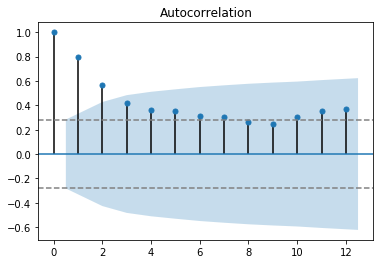

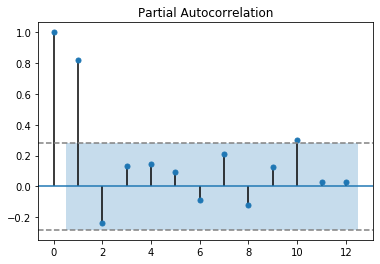

In [412]:
### ACF and PACF

#### ACF: n th lag of ACF is the correlation between a day and n days before that. 
#PACF: The same as ACF with all intermediate correlations removed.

#ACF
plot_acf(train.Price, zero=True, lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--',color='gray')

#PACF
plot_pacf(train.Price,zero=True,lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.show()



## Making the data stationary

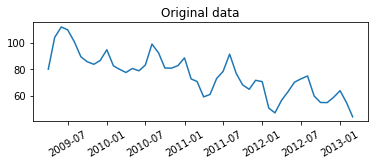

In [413]:
#### Looking at the Y scale in ACF we observe that both trend and seasonality is present.

#### Stationarize by differencing

# Before differencing
plt.subplot(212)
plt.plot(train.Price)
plt.xticks(rotation=30)
plt.title("Original data")
plt.show()




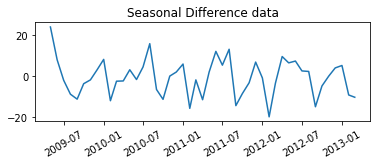

In [414]:
# After differencing
plt.subplot(212)
plt.plot(train.Price.diff(1))
plt.xticks(rotation=30)
plt.title("Seasonal Difference data")
plt.show()



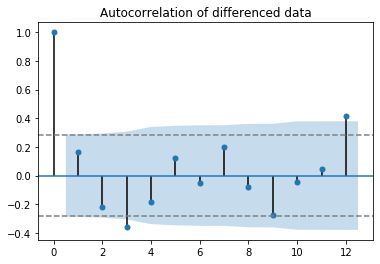

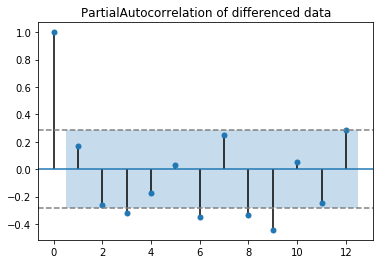

In [415]:
#### ACF plot and PACF plt after differencing

plot_acf(train.Price.diff(1).dropna(),zero=True,lags=12,title='Autocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plot_pacf(train.Price.diff(1).dropna(),zero=True,lags=12,title='PartialAutocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plt.show()



/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: dtype lost in 'diff()'. In the future this will raise a TypeError. Convert to a suitable dtype prior to calling 'diff'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


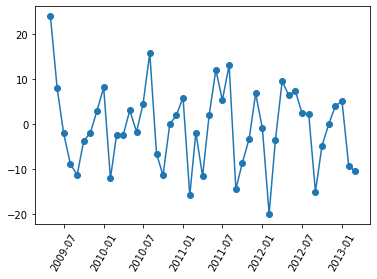

In [416]:
#### Visualizing the differenced data

plt.plot(train.index, train.diff(1).Price.values,'-o')
plt.xticks(rotation = 60)
plt.show()

## Statistical Tests

In [417]:
from statsmodels.tsa.stattools import adfuller

In [418]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [419]:
adfuller_test(train['Price'])

ADF Test Statistic : -0.5563647080341172
p-value : 0.8805401783657371
#Lags Used : 9
Number of Observations Used : 38
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [420]:
adfuller_test(train['Price'].diff(1)[1:])

ADF Test Statistic : -4.675071090602694
p-value : 9.371071798731841e-05
#Lags Used : 10
Number of Observations Used : 36
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## ARIMA Model

In [421]:
from statsmodels.tsa.arima.model import ARIMA

In [422]:

# AR(p=2 ) = y t  =  alpha + Beta1 * y(t-1) + Beta2 * y(t-2)+ error(t-1) + Beta2 * error(t-2) 

In [423]:
model_arima = ARIMA(train['Price'].values, order=(2,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -164.031
Date:                Sat, 04 Jun 2022   AIC                            336.062
Time:                        11:15:55   BIC                            343.463
Sample:                             0   HQIC                           338.847
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8634      0.193      4.465      0.000       0.484       1.242
ar.L2         -0.4674      0.198     -2.364      0.018      -0.855      -0.080
ma.L1         -0.7555      0.222     -3.410      0.0

/usr/share/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [424]:
model_arima_forecast = model_arima_fit.forecast(steps = len(test))
print(model_arima_forecast)

[45.53391957 51.7183982  56.34615494 57.45087844 56.241506   54.6809529
 53.89888623 53.95311468 54.36550195]


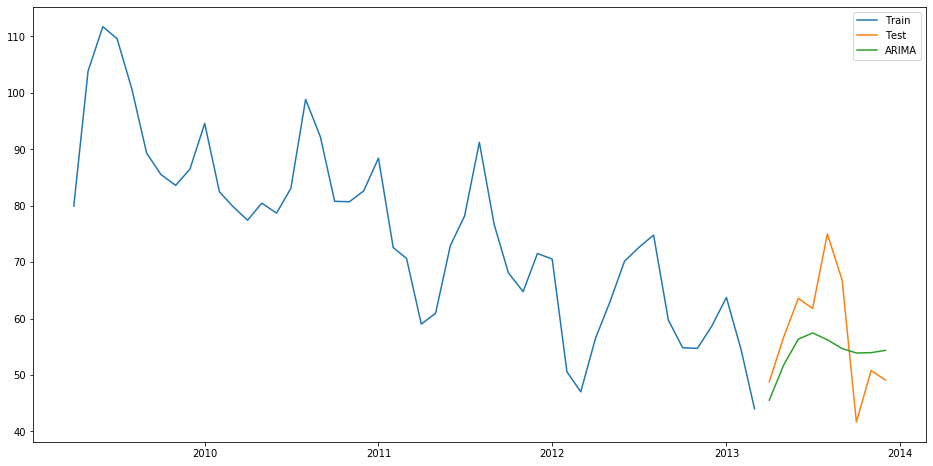

In [425]:
model_forecast['ARIMA'] = model_arima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [426]:
error_metrics(train['Price'], model_arima_fit.forecast(steps = len(train)),test['Price'], 
              model_arima_fit.forecast(len(test)))


*** Error metrics Train data ***
MAE Train: 22.154408224379733
MSE Train: 699.0175242917217
RMSE Train: 26.43893954552114
MAPE Train: 0.2666849502879256
***
 Error metrics Test Data ***
MAE Train: 7.926624768537272
MSE Train: 88.12097713366605
RMSE Train: 9.387277407942413
MAPE Train: 0.1370008540626757


## SARIMA Models

In [427]:
model_sarima = ARIMA(train['Price'].values, order=(1,0,1),seasonal_order=(1,0,1,12))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())

/usr/share/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/share/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                   48
Model:             ARIMA(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -162.051
Date:                          Sat, 04 Jun 2022   AIC                            336.101
Time:                                  11:15:55   BIC                            347.329
Sample:                                       0   HQIC                           340.344
                                           - 48                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.2851      9.434      7.874      0.000      55.795      92.775
ar.L1          0.6803      0.164      4.144      0.

In [428]:
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)

[53.05642141 60.80416507 65.51118676 68.21511327 69.35069002 62.78333173
 61.14558519 62.26808084 63.78191804]


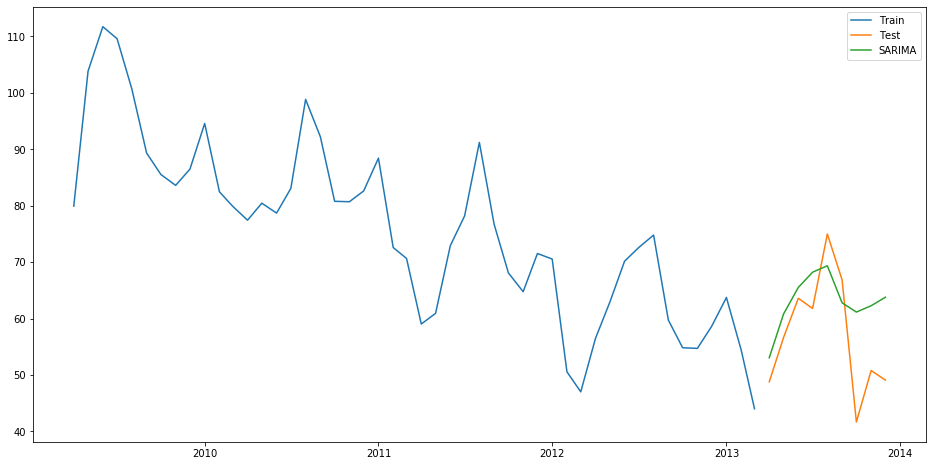

In [429]:
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

/usr/share/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                   48
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -117.747
Date:                          Sat, 04 Jun 2022   AIC                            245.493
Time:                                  11:15:56   BIC                            253.270
Sample:                                       0   HQIC                           248.178
                                           - 48                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4954      0.310      1.598      0.110      -0.112       1.103
ma.L1         -0.9997    113.024     -0.009      0.

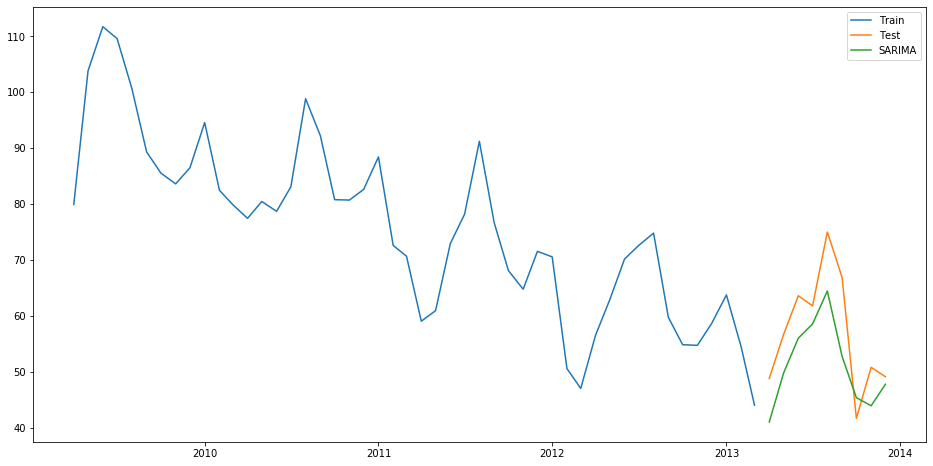

In [430]:
model_sarima = ARIMA(train['Price'].values, order=(1,1,1),seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [431]:
test.Price

Date
2013-04-01    48.792000
2013-05-01    56.641290
2013-06-01    63.586333
2013-07-01    61.783548
2013-08-01    74.991129
2013-09-01    66.848000
2013-10-01    41.663871
2013-11-01    50.784500
2013-12-01    49.100000
Name: Price, dtype: float64

In [432]:
error_metrics(train['Price'], model_sarima_fit.forecast(steps=len(train)),test['Price'], 
              model_sarima_fit.forecast(steps=len(test)))


*** Error metrics Train data ***
MAE Train: 43.389944766962564
MSE Train: 1908.9238595516908
RMSE Train: 43.69123321161456
MAPE Train: 0.5958396923487009
***
 Error metrics Test Data ***
MAE Train: 6.9021404860366955
MSE Train: 61.115100524145106
RMSE Train: 7.817614759256503
MAPE Train: 0.1174307296306815


In [433]:
error_metrics(train['Price'], model_sarima_fit.forecast(steps=len(train)),test['Price'], 
              model_sarima_fit.forecast(steps=len(test)))


*** Error metrics Train data ***
MAE Train: 43.389944766962564
MSE Train: 1908.9238595516908
RMSE Train: 43.69123321161456
MAPE Train: 0.5958396923487009
***
 Error metrics Test Data ***
MAE Train: 6.9021404860366955
MSE Train: 61.115100524145106
RMSE Train: 7.817614759256503
MAPE Train: 0.1174307296306815


In [434]:
error_metrics(train['Price'], model_sarima_fit.forecast(steps=len(train)),test['Price'], 
              model_sarima_fit.forecast(steps=len(test)))


*** Error metrics Train data ***
MAE Train: 43.389944766962564
MSE Train: 1908.9238595516908
RMSE Train: 43.69123321161456
MAPE Train: 0.5958396923487009
***
 Error metrics Test Data ***
MAE Train: 6.9021404860366955
MSE Train: 61.115100524145106
RMSE Train: 7.817614759256503
MAPE Train: 0.1174307296306815


In [435]:
model_forecast

,Month,Price,Time_seq,moving_avg_forecast,Holt_Winter,ARIMA,SARIMA
Date,,,,,,,
2013-04-01,4,48.792000,49,57.336863,46.532428,45.533920,40.995962
2013-05-01,5,56.641290,50,56.774336,49.448495,51.718398,49.737539
2013-06-01,6,63.586333,51,56.055940,54.720800,56.346155,56.000402
2013-07-01,7,61.783548,52,56.722379,56.164537,57.450878,58.543102
2013-08-01,8,74.991129,53,56.517552,58.899261,56.241506,64.434234
2013-09-01,9,66.848000,54,56.431957,48.899693,54.680953,52.728722
2013-10-01,10,41.663871,55,56.557296,44.426882,53.898886,45.353038
2013-11-01,11,50.784500,56,56.502268,43.538012,53.953115,43.905744
2013-12-01,12,49.100000,57,56.497174,45.789900,54.365502,47.750998


In [436]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


### Auto ARIMA Models

In [437]:
from pmdarima.arima import auto_arima

In [438]:
model_autoArima = auto_arima(y=train['Price'])
print(model_autoArima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -156.216
Date:                Sat, 04 Jun 2022   AIC                            324.431
Time:                        11:16:01   BIC                            335.532
Sample:                             0   HQIC                           328.609
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3507      0.098     -3.581      0.000      -0.543      -0.159
ar.L1          1.3613      0.163      8.361      0.000       1.042       1.680
ar.L2         -0.7507      0.120     -6.234      0.0

In [439]:
train_pred = model_autoArima.predict(n_periods=len(train))
test_pred = model_autoArima.predict(n_periods=len(test))

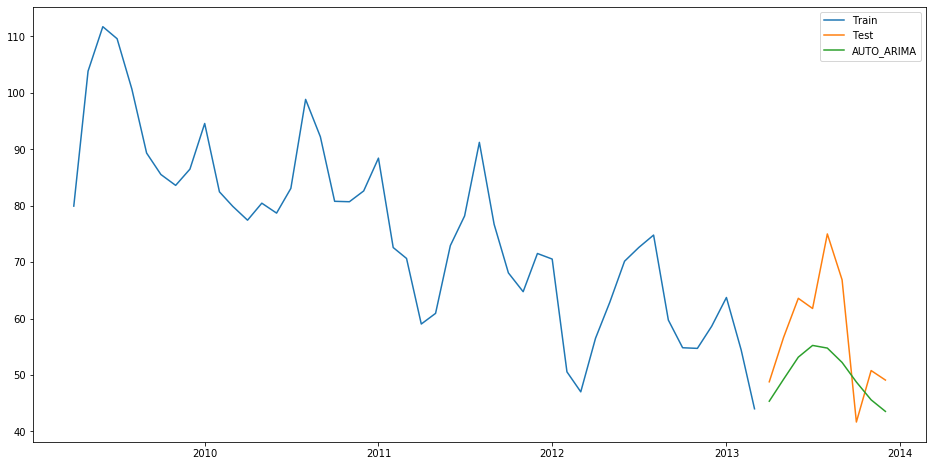

In [440]:
model_forecast['AUTO_ARIMA'] = test_pred
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['AUTO_ARIMA'], label='AUTO_ARIMA')
plt.legend(loc='best')
plt.show()

In [441]:
error_metrics(train['Price'], train_pred,test['Price'], 
              test_pred)


*** Error metrics Train data ***
MAE Train: 43.55280974799729
MSE Train: 1974.4013638295612
RMSE Train: 44.43423639300625
MAPE Train: 0.5864581227746521
***
 Error metrics Test Data ***
MAE Train: 8.94443634027309
MSE Train: 105.47347576632347
RMSE Train: 10.270028031428321
MAPE Train: 0.1494517680621884
